Preprocessing (31 pts)

1.[8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [3]:
import csv
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
from collections import defaultdict
from matplotlib import pyplot as plt
import random
import re
def read_file():
    with open("GermanCredit.csv",'r') as file_name:
        file_read = pd.read_csv(file_name)

    return file_read
read_file()

checking_status  duration                    credit_history  \
0              '<0'         6  'critical/other existing credit'   
1        '0<=X<200'        48                   'existing paid'   
2     'no checking'        12  'critical/other existing credit'   
3              '<0'        42                   'existing paid'   
4              '<0'        24              'delayed previously'   
..              ...       ...                               ...   
995   'no checking'        12                   'existing paid'   
996            '<0'        30                   'existing paid'   
997   'no checking'        12                   'existing paid'   
998            '<0'        45                   'existing paid'   
999      '0<=X<200'        45  'critical/other existing credit'   

                 purpose  credit_amount      savings_status  employment  \
0               radio/tv           1169  'no known savings'       '>=7'   
1               radio/tv           5951              '<100'    '1<=X<4'   
2              education           2096              '<100'    '4<=X<7'   
3    furniture/equipment           7882              '<100'    '4<=X<7'   
4              'new car'           4870              '<100'    '1<=X<4'   
..                   ...            ...                 ...         ...   
995  furniture/equipment           1736              '<100'    '4<=X<7'   
996           'used car'           3857              '<100'    '1<=X<4'   
997             radio/tv            804              '<100'       '>=7'   
998             radio/tv           1845              '<100'    '1<=X<4'   
999           'used car'           4576        '100<=X<500'  unemployed   

     installment_commitment       personal_status other_parties  ...  \
0                         4         'male single'          none  ...   
1                         2  'female div/dep/mar'          none  ...   
2                         2         'male single'          none  ...   
3                         2         'male single'     guarantor  ...   
4                         3         'male single'          none  ...   
..                      ...                   ...           ...  ...   
995                       3  'female div/dep/mar'          none  ...   
996                       4        'male div/sep'          none  ...   
997                       4         'male single'          none  ...   
998                       4         'male single'          none  ...   
999                       3         'male single'          none  ...   

      property_magnitude age  other_payment_plans     housing  \
0          'real estate'  67                 none         own   
1          'real estate'  22                 none         own   
2          'real estate'  49                 none         own   
3       'life insurance'  45                 none  'for free'   
4    'no known property'  53                 none  'for free'   
..                   ...  ..                  ...         ...   
995        'real estate'  31                 none         own   
996     'life insurance'  40                 none         own   
997                  car  38                 none         own   
998  'no known property'  23                 none  'for free'   
999                  car  27                 none         own   

    existing_credits                          job num_dependents  \
0                  2                      skilled              1   
1                  1                      skilled              1   
2                  1         'unskilled resident'              2   
3                  1                      skilled              2   
4                  2                      skilled              2   
..               ...                          ...            ...   
995                1         'unskilled resident'              1   
996                1  'high qualif/self emp/mgmt'              1   
997                1                    

In [6]:
def del_columns(n=3):
    gc_df = read_file()
    count = []
    name = []
    for index in range(gc_df.shape[1]):
        counter = 0
        columnSeriesObj = gc_df.iloc[:, index]

        if "none" in list(columnSeriesObj.values):
            for i in range(0,len(columnSeriesObj.values)):
                if columnSeriesObj.values[i] == "none":
                    counter += 1
                    colname = gc_df.columns[index]                    
            count.append((index,counter))
    #print(count)
    for col in count:
        colname = gc_df.columns[col[0]]
        name.append(colname)
    
    for cname in name:
        del gc_df[cname]
                    
    return gc_df

In [7]:
del_columns()

checking_status  duration                    credit_history  \
0              '<0'         6  'critical/other existing credit'   
1        '0<=X<200'        48                   'existing paid'   
2     'no checking'        12  'critical/other existing credit'   
3              '<0'        42                   'existing paid'   
4              '<0'        24              'delayed previously'   
..              ...       ...                               ...   
995   'no checking'        12                   'existing paid'   
996            '<0'        30                   'existing paid'   
997   'no checking'        12                   'existing paid'   
998            '<0'        45                   'existing paid'   
999      '0<=X<200'        45  'critical/other existing credit'   

                 purpose  credit_amount      savings_status  employment  \
0               radio/tv           1169  'no known savings'       '>=7'   
1               radio/tv           5951              '<100'    '1<=X<4'   
2              education           2096              '<100'    '4<=X<7'   
3    furniture/equipment           7882              '<100'    '4<=X<7'   
4              'new car'           4870              '<100'    '1<=X<4'   
..                   ...            ...                 ...         ...   
995  furniture/equipment           1736              '<100'    '4<=X<7'   
996           'used car'           3857              '<100'    '1<=X<4'   
997             radio/tv            804              '<100'       '>=7'   
998             radio/tv           1845              '<100'    '1<=X<4'   
999           'used car'           4576        '100<=X<500'  unemployed   

     installment_commitment       personal_status  residence_since  \
0                         4         'male single'                4   
1                         2  'female div/dep/mar'                2   
2                         2         'male single'                3   
3                         2         'male single'                4   
4                         3         'male single'                4   
..                      ...                   ...              ...   
995                       3  'female div/dep/mar'                4   
996                       4        'male div/sep'                4   
997                       4         'male single'                4   
998                       4         'male single'                4   
999                       3         'male single'                4   

      property_magnitude  age     housing  existing_credits  \
0          'real estate'   67         own                 2   
1          'real estate'   22         own                 1   
2          'real estate'   49         own                 1   
3       'life insurance'   45  'for free'                 1   
4    'no known property'   53  'for free'                 2   
..                   ...  ...         ...               ...   
995        'real estate'   31         own                 1   
996     'life insurance'   40         own                 1   
997                  car   38         own                 1   
998  'no known property'   23  'for free'                 1   
999                  car   27         own                 1   

                             job  num_dependents foreign_worker class  
0                        skilled               1            yes  good  
1                        skilled               1            yes   bad  
2           'unskilled resident'               2            yes  good  
3                        skilled               2            yes  good  
4                        skilled               2            yes   bad  
..                           ...             ...            ...   ...  
995         'unskilled resident'               1            yes  good  
996  'high qualif/self emp/mgmt'               1            yes  good  
997                      skilled               1    

In [8]:
def drop_ap():
    df = del_columns()
    df.replace('\'','', regex=True, inplace=True) 
    return df
        

In [9]:
drop_ap()

checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   
2              education           2096              <100      4<=X<7   
3    furniture/equipment           7882              <100      4<=X<7   
4                new car           4870              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment           1736              <100      4<=X<7   
996             used car           3857              <100      1<=X<4   
997             radio/tv            804              <100         >=7   
998             radio/tv           1845              <100      1<=X<4   
999             used car           4576        100<=X<500  unemployed   

     installment_commitment     personal_status  residence_since  \
0                         4         male single                4   
1                         2  female div/dep/mar                2   
2                         2         male single                3   
3                         2         male single                4   
4                         3         male single                4   
..                      ...                 ...              ...   
995                       3  female div/dep/mar                4   
996                       4        male div/sep                4   
997                       4         male single                4   
998                       4         male single                4   
999                       3         male single                4   

    property_magnitude  age   housing  existing_credits  \
0          real estate   67       own                 2   
1          real estate   22       own                 1   
2          real estate   49       own                 1   
3       life insurance   45  for free                 1   
4    no known property   53  for free                 2   
..                 ...  ...       ...               ...   
995        real estate   31       own                 1   
996     life insurance   40       own                 1   
997                car   38       own                 1   
998  no known property   23  for free                 1   
999                car   27       own                 1   

                           job  num_dependents foreign_worker class  
0                      skilled               1            yes  good  
1                      skilled               1            yes   bad  
2           unskilled resident               2            yes  good  
3                      skilled               2            yes  good  
4                      skilled               2            yes   bad  
..                         ...             ...            ...   ...  
995         unskilled resident               1            yes  good  
996  high qualif/self emp/mgmt               1            yes  good  
997                    skilled               1            yes  good  
998                    skilled               1            yes   bad  
999                    skilled               1    

3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [10]:
def q3():
    df = drop_ap()
    df["checking_status"] = df["checking_status"].replace("<0","Low")
    df["checking_status"] = df["checking_status"].replace("no checking","No Checking")
    df["checking_status"] = df["checking_status"].replace("0<=X<200","Medium")
    df["checking_status"] = df["checking_status"].replace(">=200","High")

    return df

In [11]:
q3()

checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   
2              education           2096              <100      4<=X<7   
3    furniture/equipment           7882              <100      4<=X<7   
4                new car           4870              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment           1736              <100      4<=X<7   
996             used car           3857              <100      1<=X<4   
997             radio/tv            804              <100         >=7   
998             radio/tv           1845              <100      1<=X<4   
999             used car           4576        100<=X<500  unemployed   

     installment_commitment     personal_status  residence_since  \
0                         4         male single                4   
1                         2  female div/dep/mar                2   
2                         2         male single                3   
3                         2         male single                4   
4                         3         male single                4   
..                      ...                 ...              ...   
995                       3  female div/dep/mar                4   
996                       4        male div/sep                4   
997                       4         male single                4   
998                       4         male single                4   
999                       3         male single                4   

    property_magnitude  age   housing  existing_credits  \
0          real estate   67       own                 2   
1          real estate   22       own                 1   
2          real estate   49       own                 1   
3       life insurance   45  for free                 1   
4    no known property   53  for free                 2   
..                 ...  ...       ...               ...   
995        real estate   31       own                 1   
996     life insurance   40       own                 1   
997                car   38       own                 1   
998  no known property   23  for free                 1   
999                car   27       own                 1   

                           job  num_dependents foreign_worker class  
0                      skilled               1            yes  good  
1                      skilled               1            yes   bad  
2           unskilled resident               2            yes  good  
3                      skilled               2            yes  good  
4                      skilled               2            yes   bad  
..                         ...             ...            ...   ...  
995         unskilled resident               1            yes  good  
996  high qualif/self emp/mgmt               1            yes  good  
997                    skilled               1            yes  good  
998                    skilled               1            yes   bad  
999                    skilled               1    

4.[5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [12]:
def q4():
    df = q3()
    df["savings_status"] = df["savings_status"].replace("<100","Low")
    df["savings_status"] = df["savings_status"].replace("no known savings","No Savings")
    df["savings_status"] = df["savings_status"].replace("100<=X<500","Medium")
    df["savings_status"] = df["savings_status"].replace("500<=X<1000","High")

    df["savings_status"] = df["savings_status"].replace(">=1000","High")

    return df

In [13]:
q4()

checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv           1169     No Savings         >=7   
1               radio/tv           5951            Low      1<=X<4   
2              education           2096            Low      4<=X<7   
3    furniture/equipment           7882            Low      4<=X<7   
4                new car           4870            Low      1<=X<4   
..                   ...            ...            ...         ...   
995  furniture/equipment           1736            Low      4<=X<7   
996             used car           3857            Low      1<=X<4   
997             radio/tv            804            Low         >=7   
998             radio/tv           1845            Low      1<=X<4   
999             used car           4576         Medium  unemployed   

     installment_commitment     personal_status  residence_since  \
0                         4         male single                4   
1                         2  female div/dep/mar                2   
2                         2         male single                3   
3                         2         male single                4   
4                         3         male single                4   
..                      ...                 ...              ...   
995                       3  female div/dep/mar                4   
996                       4        male div/sep                4   
997                       4         male single                4   
998                       4         male single                4   
999                       3         male single                4   

    property_magnitude  age   housing  existing_credits  \
0          real estate   67       own                 2   
1          real estate   22       own                 1   
2          real estate   49       own                 1   
3       life insurance   45  for free                 1   
4    no known property   53  for free                 2   
..                 ...  ...       ...               ...   
995        real estate   31       own                 1   
996     life insurance   40       own                 1   
997                car   38       own                 1   
998  no known property   23  for free                 1   
999                car   27       own                 1   

                           job  num_dependents foreign_worker class  
0                      skilled               1            yes  good  
1                      skilled               1            yes   bad  
2           unskilled resident               2            yes  good  
3                      skilled               2            yes  good  
4                      skilled               2            yes   bad  
..                         ...             ...            ...   ...  
995         unskilled resident               1            yes  good  
996  high qualif/self emp/mgmt               1            yes  good  
997                    skilled               1            yes  good  
998                    skilled               1            yes   bad  
999                    skilled               1            yes  good  

[1000 rows x 18

5.[4 pts] Change class column values from 'good' to '1' and 'bad' to '0'


In [14]:
def q5():
    df = q4()
    df["class"] = df["class"].replace("good","1")
    df["class"] = df["class"].replace("bad","0")
    return df

In [15]:
q5()

checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv           1169     No Savings         >=7   
1               radio/tv           5951            Low      1<=X<4   
2              education           2096            Low      4<=X<7   
3    furniture/equipment           7882            Low      4<=X<7   
4                new car           4870            Low      1<=X<4   
..                   ...            ...            ...         ...   
995  furniture/equipment           1736            Low      4<=X<7   
996             used car           3857            Low      1<=X<4   
997             radio/tv            804            Low         >=7   
998             radio/tv           1845            Low      1<=X<4   
999             used car           4576         Medium  unemployed   

     installment_commitment     personal_status  residence_since  \
0                         4         male single                4   
1                         2  female div/dep/mar                2   
2                         2         male single                3   
3                         2         male single                4   
4                         3         male single                4   
..                      ...                 ...              ...   
995                       3  female div/dep/mar                4   
996                       4        male div/sep                4   
997                       4         male single                4   
998                       4         male single                4   
999                       3         male single                4   

    property_magnitude  age   housing  existing_credits  \
0          real estate   67       own                 2   
1          real estate   22       own                 1   
2          real estate   49       own                 1   
3       life insurance   45  for free                 1   
4    no known property   53  for free                 2   
..                 ...  ...       ...               ...   
995        real estate   31       own                 1   
996     life insurance   40       own                 1   
997                car   38       own                 1   
998  no known property   23  for free                 1   
999                car   27       own                 1   

                           job  num_dependents foreign_worker class  
0                      skilled               1            yes     1  
1                      skilled               1            yes     0  
2           unskilled resident               2            yes     1  
3                      skilled               2            yes     1  
4                      skilled               2            yes     0  
..                         ...             ...            ...   ...  
995         unskilled resident               1            yes     1  
996  high qualif/self emp/mgmt               1            yes     1  
997                    skilled               1            yes     1  
998                    skilled               1            yes     0  
999                    skilled               1            yes     1  

[1000 rows x 18

6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [18]:
def q6():
    df = q5()
    df["employment"] = df["employment"].replace("unemployed","Unemployed")
    df["employment"] = df["employment"].replace("<1","Amateur")
    df["employment"] = df["employment"].replace("1<=X<4","Professional")
    df["employment"] = df["employment"].replace("4<=X<7","Experienced")
    df["employment"] = df["employment"].replace(">=7","Expert")

    return df

In [19]:
q6()

checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status    employment  \
0               radio/tv           1169     No Savings        Expert   
1               radio/tv           5951            Low  Professional   
2              education           2096            Low   Experienced   
3    furniture/equipment           7882            Low   Experienced   
4                new car           4870            Low  Professional   
..                   ...            ...            ...           ...   
995  furniture/equipment           1736            Low   Experienced   
996             used car           3857            Low  Professional   
997             radio/tv            804            Low        Expert   
998             radio/tv           1845            Low  Professional   
999             used car           4576         Medium    Unemployed   

     installment_commitment     personal_status  residence_since  \
0                         4         male single                4   
1                         2  female div/dep/mar                2   
2                         2         male single                3   
3                         2         male single                4   
4                         3         male single                4   
..                      ...                 ...              ...   
995                       3  female div/dep/mar                4   
996                       4        male div/sep                4   
997                       4         male single                4   
998                       4         male single                4   
999                       3         male single                4   

    property_magnitude  age   housing  existing_credits  \
0          real estate   67       own                 2   
1          real estate   22       own                 1   
2          real estate   49       own                 1   
3       life insurance   45  for free                 1   
4    no known property   53  for free                 2   
..                 ...  ...       ...               ...   
995        real estate   31       own                 1   
996     life insurance   40       own                 1   
997                car   38       own                 1   
998  no known property   23  for free                 1   
999                car   27       own                 1   

                           job  num_dependents foreign_worker class  
0                      skilled               1            yes     1  
1                      skilled               1            yes     0  
2           unskilled resident               2            yes     1  
3                      skilled               2            yes     1  
4                      skilled               2            yes     0  
..                         ...             ...            ...   ...  
995         unskilled resident               1            yes     1  
996  high qualif/self emp/mgmt               1            yes     1  
997                    skilled               1            yes     1  
998                    skilled               1            yes     0  
999                    skilled               1            yes 

ANALYSIS

In [20]:
def category_count1():
    gc_df = q6()
    columnSeriesObj1 = gc_df.iloc[:, 16]
    a = columnSeriesObj1.values
    columnSeriesObj2 = gc_df.iloc[:, 17]
    b = columnSeriesObj2.values
    count = pd.crosstab(a, b, rownames=['foreign_worker'], colnames=['class'])
    
    return count

In [21]:
category_count1()

class             0    1
foreign_worker          
no                4   33
yes             296  667

In [22]:
def category_count2():
    gc_df = q6()
    columnSeriesObj1 = gc_df.iloc[:, 5]
    a = columnSeriesObj1.values
    columnSeriesObj2 = gc_df.iloc[:, 6]
    b = columnSeriesObj2.values
    count = pd.crosstab(a, b, rownames=['savings_status'], colnames=['employment'])
    
    return count

In [23]:
category_count2()

employment      Amateur  Experienced  Expert  Professional  Unemployed
savings_status                                                        
High                 12           18      34            44           3
Low                 120          100     133           210          40
Medium               17           24      22            33           7
No Savings           23           32      64            52          12

In [24]:
def get_avg1():
    gc_df = q6()
    avg_values = pd.crosstab(gc_df.employment, gc_df.personal_status, values = gc_df.credit_amount, aggfunc = 'mean')
    
    
    avg = avg_values["male single"].values[1]
    
    return avg

In [25]:
 get_avg1()

4142.592592592592

In [26]:
def get_avg2():
    gc_df = q6()
    avg_values = gc_df.groupby('job')['duration'].mean().reset_index()
    
    return avg_values

In [27]:
get_avg2()

job   duration
0  high qualif/self emp/mgmt  25.168919
1                    skilled  21.411111
2    unemp/unskilled non res  17.363636
3         unskilled resident  16.535000

In [28]:
def most_common():
    gc_df = q6()
    columnSeriesObj1 = gc_df.iloc[:, 0]
    a = columnSeriesObj1.values
    columnSeriesObj2 = gc_df.iloc[:, 3]
    b = columnSeriesObj2.values
    columnSeriesObj2 = gc_df.iloc[:, 5]
    c = columnSeriesObj2.values
    count1 = pd.crosstab(a, b, rownames=['checking_status'], colnames=['purpose'])
    count2 = pd.crosstab(c, b, rownames=['savings_status'], colnames=['purpose'])
    
    max_checking = sorted(count1["education"].values, reverse = True)
    count_max_checking = count1.query('education == @max_checking[0]')
    
    max_savings = sorted(count2["education"].values, reverse = True)
    count_max_savings = count2.query('education == @max_savings[0]')
    
    index1 = count_max_checking.index
    list1 = list(index1)
    
    index2 = count_max_savings.index
    list2 = list(index2)
    
    values = "Most common checking status: " +  list1[0] +  "\n" + "Most common savings status: " + list2[0]
    print(values)
        
    return 

In [29]:
most_common()

Most common checking status: No Checking
Most common savings status: Low


VISUALIZATION

1.[9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

In [30]:
def hist():
    df = q6()
    fig, axes = plt.subplots(1,2,figsize=(10,8),sharey=True)
    fig.tight_layout(h_pad=5.0,w_pad=3.0)
    c = ['black', 'red', 'green', 'blue']
    
    x1 = df[df["personal_status"] == "male single"]
    x2 = df[df["personal_status"] == "female div/dep/mar"]
    x3 = df[df["personal_status"] == "male div/sep"]
    x4 = df[df["personal_status"] == "male mar/wid"]

    axes[0].hist(x1["savings_status"],histtype = 'bar', color = 'b', label = "male single" )
    axes[0].hist(x2["savings_status"],histtype = 'bar', color = 'r', label = "female div/dep/mar" )
    axes[0].hist(x3["savings_status"],histtype = 'bar', color = 'g', label = "male div/sep" )
    axes[0].hist(x4["savings_status"],histtype = 'bar', color = 'cyan', label = "male mar/wid" )
    #axes[0].legend()
    axes[0].set_title('Savings status')
    
    
    
    axes[1].hist(x1["checking_status"],histtype = 'bar',color= 'b',label = "male single")
    axes[1].hist(x2["checking_status"],histtype = 'bar',color= 'r',label = "female div/dep/mar")
    axes[1].hist(x3["checking_status"],histtype = 'bar',color= 'g', label = "male div/sep")
    axes[1].hist(x4["checking_status"],histtype = 'bar',color= 'cyan', label = "male mar/wid")
    #axes[1].legend()
    axes[1].set_title('Checking Status')
    
    plt.legend()

    plt.show()
    

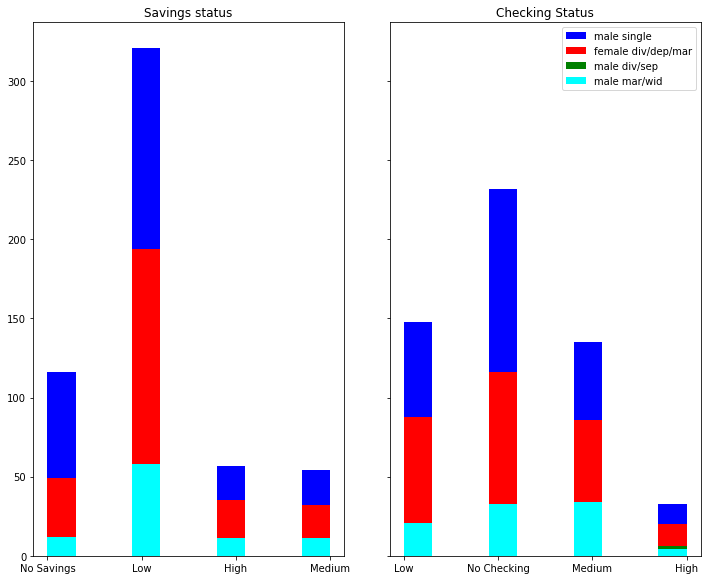

In [31]:
hist()

2.[9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

In [36]:
def vis2():
    #plt.subplots(1,1,sharex = True)
    df = q6()
    x = df[df["credit_amount"]>4000]

    props = x["property_magnitude"].unique()
    y_vals = []
    for val in props:
        #print(val)
        #print(i)
        #print(props[i])
        y = x[x["property_magnitude"]==val]
        #print(y)
        #print(y.mean())
        y_vals.append(y["age"].mean())
    #y_vals = [y1["age"].mean(),y2["age"].mean(),y3["age"].mean(),y4["age"].mean()]
    #print(y_vals)
    plt.ylim(0,50)
    plt.yticks(range(0,50,2))
    #print(x["property_magnitude"].unique())
    plt.bar(props,y_vals)
    #plt.bar("life insurance",y2["age"].mean())
    #plt.bar("no known property",y3["age"].mean())
    #plt.bar("car",y4["age"].mean())
   

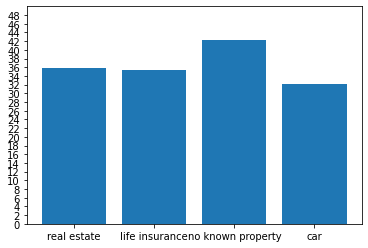

In [37]:
vis2()

3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:

    a. Personal status
    
    b. Credit history
    
    c. Job

In [40]:
def vis3():
    df = q6()
    #movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

    print(df["savings_status"].unique())
    sub = df[(df["savings_status"] == "High") & (df["age"]> 40)]
    
    #plot = sub.plot.pie(subplots=True, figsize=(11, 6))
    #fig.tight_layout(h_pad=5.0,w_pad=3.0)
    colors = ['red', 'blue', 'green', 'cyan', 'purple', 'orange']
    fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,30))
    label_function = '%1.1f%%'
    sub.groupby('personal_status').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue', 'cyan'], ax=ax1)
    sub.groupby('credit_history').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue', 'cyan'], ax=ax2)
    sub.groupby('job').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue','cyan'], ax=ax3)
    #ax1.pie(sub["personal_status"], labels = sub["personal_status"].unique(),colors = colors,autopct = '%1.1f%%')
    #ax2.pie(sub["credit_history"], labels = sub["credit_history"].unique(),colors = colors,autopct = '%1.1f%%')
    #ax3.pie(sub["job"], labels = sub["job"].unique(),colors = colors,autopct = '%1.1f%%')
    ax1.set_ylabel('Personal Status', size=15)
    ax2.set_ylabel('Credit History', size=15)
    ax3.set_ylabel('Job', size=15)
    plt.tight_layout()
    plt.show()

['No Savings' 'Low' 'High' 'Medium']


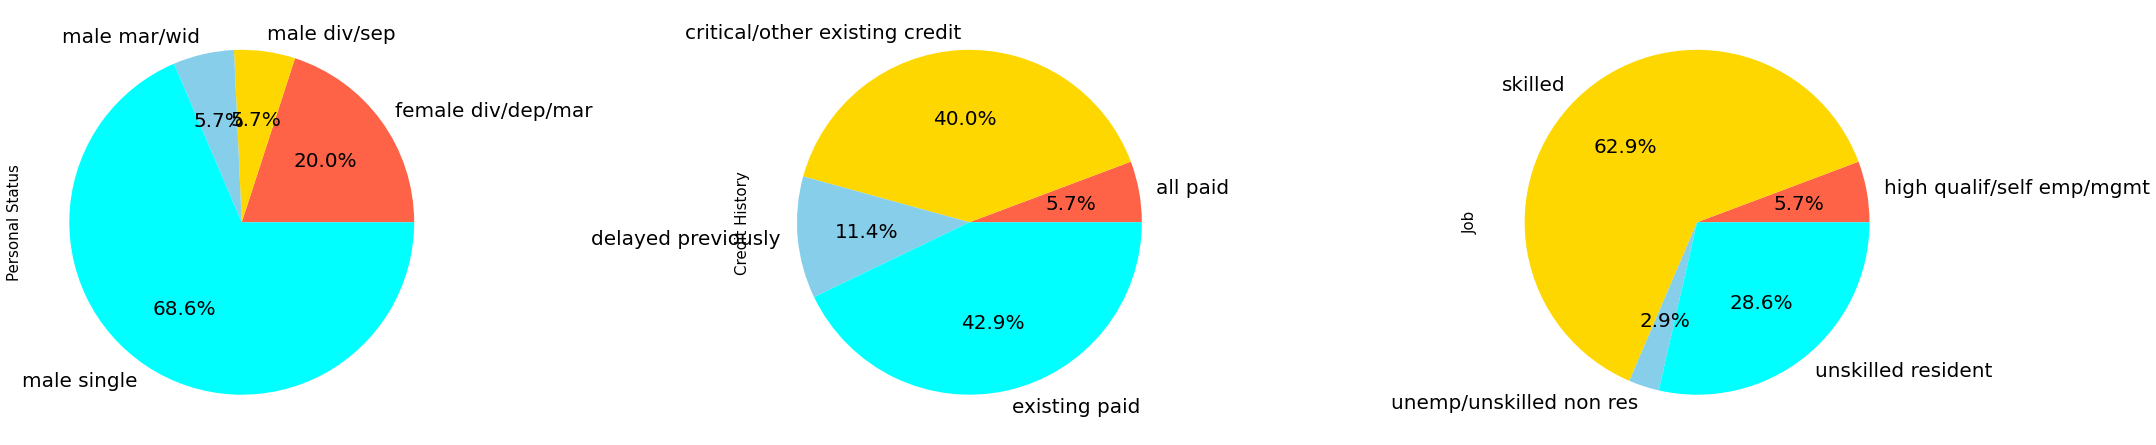

In [41]:
vis3()